In [1]:
corpus = ['the woman is a wise queen',
          'the man is a wise president',
          'she is a pretty woman',
          'he is a strong man',
          'she is still young',
          'he is very old',
          'he is the current president of US',
          'the prince is a son of the king',
          'the princess is a daughter of the king',
          'a prince is a young man',
          'a princess is a young woman']

In [2]:
# q1) 주석 부분에 function1의 목적을 쓰고, 그 주된 목적에 맞게 function1의 이름 변경하기
# 문장 기준 2중 리스트를 만들어서 그 안에 단어별로 나눈 리스트를 넣어준다.
# function1 = split_to_sentences
def function1(corpus):    
    sentences = []
    for sentence in corpus:
        sentences.append(sentence.split())

    s = 2 #s= window size 이고 아래 코드는 각각의 문장에서 특정 단어를 기준으로 앞뒤 2 단어를 neighbor words로 지정해주고 data라는
    #list에 저장하는 것.

    data = []
    for sentence in sentences:
        for idx, word in enumerate(sentence):
            for neighbor in sentence[max(idx - s, 0) : min(idx + s, len(sentence)) + 1] : 
                if neighbor != word:
                    data.append([word, neighbor])
    return data

In [3]:
import pandas as pd

data = function1(corpus)
df = pd.DataFrame(data, columns = ['input', 'label'])

In [4]:
df.head(20)

,input,label
0,the,woman
1,the,is
2,woman,the
3,woman,is
4,woman,a
5,is,the
6,is,woman
7,is,a
8,is,wise
9,a,woman


In [5]:
df.shape

(194, 2)

In [6]:
# q3) 주석 부분에 function2의 목적을 쓰고, 그 목적에 맞게 function2의 이름 변경하기
# 문장을 space 기준으로 단어를 나누고 중복인 단어를 뺀다.
#function2= distinct_words
def function2(corpus):
    words = []
    for text in corpus:
        for word in text.split(' '):
            words.append(word)
    words = set(words)
    return words

In [7]:
words = function2(corpus)
words

{'US',
 'a',
 'current',
 'daughter',
 'he',
 'is',
 'king',
 'man',
 'of',
 'old',
 'president',
 'pretty',
 'prince',
 'princess',
 'queen',
 'she',
 'son',
 'still',
 'strong',
 'the',
 'very',
 'wise',
 'woman',
 'young'}

In [8]:
# q4) 주석 부분에 function3의 목적을 쓰고, 그 목적에 맞게 function3과 d의 이름을 변경하기
#단어의 순서를 지정해주고 순서를 내뱉는 dict을 리턴
def function3(words):
    d = {}
    for i,word in enumerate(words):
        d[word] = i
    return d

In [9]:
d = function3(words)
d

{'man': 0,
 'son': 1,
 'is': 2,
 'very': 3,
 'US': 4,
 'strong': 5,
 'woman': 6,
 'of': 7,
 'princess': 8,
 'prince': 9,
 'still': 10,
 'old': 11,
 'a': 12,
 'president': 13,
 'current': 14,
 'queen': 15,
 'wise': 16,
 'young': 17,
 'the': 18,
 'pretty': 19,
 'he': 20,
 'daughter': 21,
 'she': 22,
 'king': 23}

In [10]:
import numpy as np

# q5) 주석 부분에 function4의 목적을 쓰고, 그 목적에 맞게 function4와 ohe의 이름 변경하기
#dim에 맞게 one_hot_encoding을 할 ohe의 틀을 짜주는 것. 그후에 단어마다 그 당어가 가지는 index일 경우 1로 채우는 것.
#embedding준비를 해주는것. 
#function4= preparing_embedding.
def function4(word_index, ONE_HOT_DIM):
    ohe = np.zeros(ONE_HOT_DIM)
    ohe[word_index] = 1
    return ohe

In [11]:
# q6) Word2Vec을 tensorflow로 구현한 코드에서 ? 부분을 올바르게 채워넣기
# q7)skip gram
# cross entropy 참고
# https://ratsgo.github.io/deep%20learning/2017/10/02/softmax/
# https://kevinthegrey.tistory.com/123

In [18]:
import tensorflow as tf

ONE_HOT_DIM = len(words)

X = [] # input word
Y = [] # target word

for x, y in zip(df['input'], df['label']):
    X.append(function4(d[x], ONE_HOT_DIM))
    Y.append(function4(d[y], ONE_HOT_DIM))

# convert X,Y to numpy arrays
X_train = np.asarray(X)
Y_train = np.asarray(Y)

# placeholders for X_train and Y_train
x = tf.placeholder(tf.float32, shape=(None,ONE_HOT_DIM))
y_label = tf.placeholder(tf.float32, shape=(None, ONE_HOT_DIM))

# embedding dimension
EMBEDDING_DIM = 2

# hidden layer : represent word vector eventually
W1 = tf.Variable(tf.random_normal([ONE_HOT_DIM, EMBEDDING_DIM]))
b1 = tf.Variable(tf.random_normal([1]))
hidden_layer = tf.add(tf.matmul(x,W1), b1)

# output layer
W2 = tf.Variable(tf.random_normal([EMBEDDING_DIM, ONE_HOT_DIM]))
b2 = tf.Variable(tf.random_normal([1]))
output = tf.nn.softmax(tf.add( tf.matmul(hidden_layer, W2), b2))

# loss function : cross entropy
loss = tf.reduce_mean(-tf.reduce_sum(y_label * tf.log(output), axis=[1]))

# training
train = tf.train.GradientDescentOptimizer(0.03).minimize(loss)

In [19]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init) 

iteration = 10000
for i in range(iteration):
    # input : X_train which is one hot encoded word
    # label : Y_train which is one hot encoded neighbor word
    sess.run(train, feed_dict={x: X_train, y_label: Y_train})
    if i % 2000 == 0:
        print('iteration '+ str(i) +' loss is : ', sess.run(loss, feed_dict={x: X_train, y_label: Y_train}))

iteration 0 loss is :  4.61098
iteration 2000 loss is :  2.6243472
iteration 4000 loss is :  2.5167696
iteration 6000 loss is :  2.4747996
iteration 8000 loss is :  2.4521394


In [20]:
# the hidden layer (W1 + b1) -> look up table
vectors = sess.run(W1 + b1)
vectors

array([[-0.88645744, -1.0932939 ],
       [-1.0788641 , -1.4273989 ],
       [-0.22647619, -0.60766673],
       [ 0.10951078, -0.48517972],
       [-0.25896037, -0.7799849 ],
       [-1.4278796 , -0.42310712],
       [-0.8940421 , -1.0827436 ],
       [ 0.6274038 , -1.0351441 ],
       [-1.9866762 , -1.7549572 ],
       [-2.0298338 , -1.7334518 ],
       [-0.5687703 , -0.2560591 ],
       [-1.9433057 ,  0.8043011 ],
       [-1.245125  ,  0.44528705],
       [ 1.142174  , -1.7267144 ],
       [-0.68500525, -0.9637991 ],
       [-0.2778321 , -1.2452109 ],
       [-1.3543853 , -0.4071355 ],
       [-1.8409228 ,  0.26646715],
       [-0.9063719 ,  0.13590974],
       [-1.8624563 ,  0.3361029 ],
       [-1.6987855 , -0.40223283],
       [-0.8490728 , -1.726865  ],
       [-1.7737978 , -0.22995406],
       [ 0.22016984, -1.9446266 ]], dtype=float32)

In [21]:
sess.close()

In [22]:
w2v_df = pd.DataFrame(vectors, columns = ['x1', 'x2'])
w2v_df['word'] = words
w2v_df = w2v_df[['word', 'x1', 'x2']]
w2v_df

,word,x1,x2
0,man,-0.886457,-1.093294
1,son,-1.078864,-1.427399
2,is,-0.226476,-0.607667
3,very,0.109511,-0.485180
4,US,-0.258960,-0.779985
5,strong,-1.427880,-0.423107
6,woman,-0.894042,-1.082744
7,of,0.627404,-1.035144
8,princess,-1.986676,-1.754957
9,prince,-2.029834,-1.733452


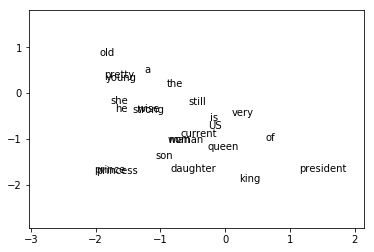

In [25]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

for word, x1, x2 in zip(w2v_df['word'], w2v_df['x1'], w2v_df['x2']):
    ax.annotate(word, (x1,x2 ))
    
PADDING = 1.0
x1_axis_min = np.amin(vectors, axis=0)[0] - PADDING
x2_axis_min = np.amin(vectors, axis=0)[1] - PADDING
x1_axis_max = np.amax(vectors, axis=0)[0] + PADDING
x2_axis_max = np.amax(vectors, axis=0)[1] + PADDING
 
plt.xlim(x1_axis_min,x1_axis_max)
plt.ylim(x2_axis_min,x2_axis_max)
plt.rcParams["figure.figsize"] = (10,10)

plt.show()

In [24]:
'''
하이퍼파라미터 조정시 단어의 유사도가 바뀐다. 신기하다. 단어의 유사성을 파악하는것인데 모수 조정시 유사성이 완전히 달라지니 어느것을
믿어야 하는지 의문이 생겼다.
'''

<module 'matplotlib.pyplot' from 'C:\\Users\\j3eun\\Anaconda3\\envs\\Herobots\\lib\\site-packages\\matplotlib\\pyplot.py'>